# EMPLOYEE CHURN PREDICTION

Cover the following topics:

* Data loading and understanding feature
* Exploratory data analysis
* Data visualization
* Cluster analysis
* Building prediction model
* Evaluating model performance

# 1. Data loading and understanding feature

* In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness.
* Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn.
* In some cases such as the employee with niche skills are harder to replace. It affects the ongoing work and productivity of existing employees.
* Acquiring new employees as a replacement has its costs such as hiring costs and training costs.
* Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee.
* Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

# 2. Exploratory Analysis

# Importing Modules

In [1]:
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs

# i.Loading Dataset

In [2]:
data=pandas.read_csv('HR_comma_sep.csv')

In [3]:
data.head() # “head()”function of pandas library which returns first five observations.
#Here, Original data is separated by comma delimiter(“ , “) in given data set.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.tail() #“tail()” returns last five observations.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


# ii. Expressing data

This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.
You can describe 10 attributes in detail as:

* satisfaction_level: It is employee satisfaction point, which ranges from 0-1.
* last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.
* number_projects: How many numbers of projects assigned to an employee?
* average_monthly_hours: How many average numbers of hours worked by an employee in a month?
* time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
* work_accident: Whether an employee has had a work accident or not.
* promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
* Departments: Employee's working department/division.
* Salary: Salary level of the employee such as low, medium and high.
* left: Whether the employee has left the company or not.

# iii. Data Insights

There are two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [6]:
left = data.groupby('left')
left.mean()

<ipython-input-6-08cf9c650d19>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  left.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Above can interpret, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

The describe() function in pandas is convenient in getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Data Visualization

# i. Employees Left

Check how many employees were left?

Here, a bar graph is plotted using Matplotlib. The bar graph is suitable for showing discrete variable counts.

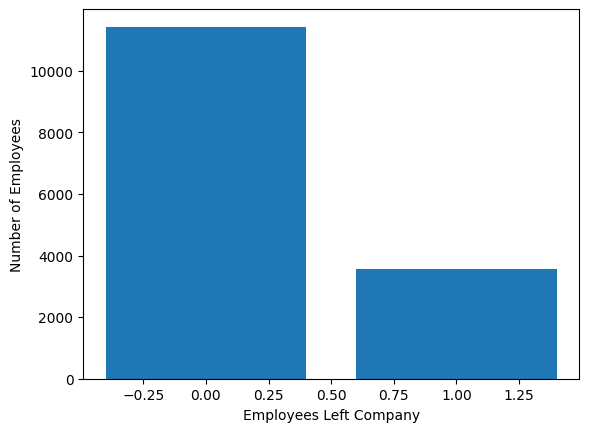

In [8]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [9]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

# ii. Number of Projects

Similarly, plot a bar graph to count the number of employees deployed on How many projects?

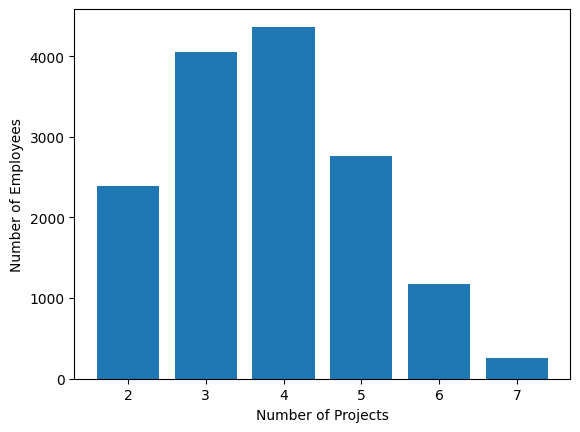

In [10]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

# iii. Time Spent in Company

Similarly, plot a bar graph to count the number of employees have based on how much experience

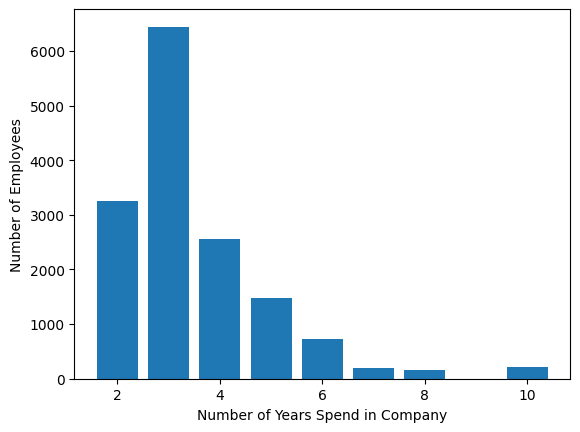

In [11]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

# iv. Subplots using Seaborn

This is how you can analyze the features one by one, but it will be time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

<ipython-input-12-e7a0c1a7c8b4>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


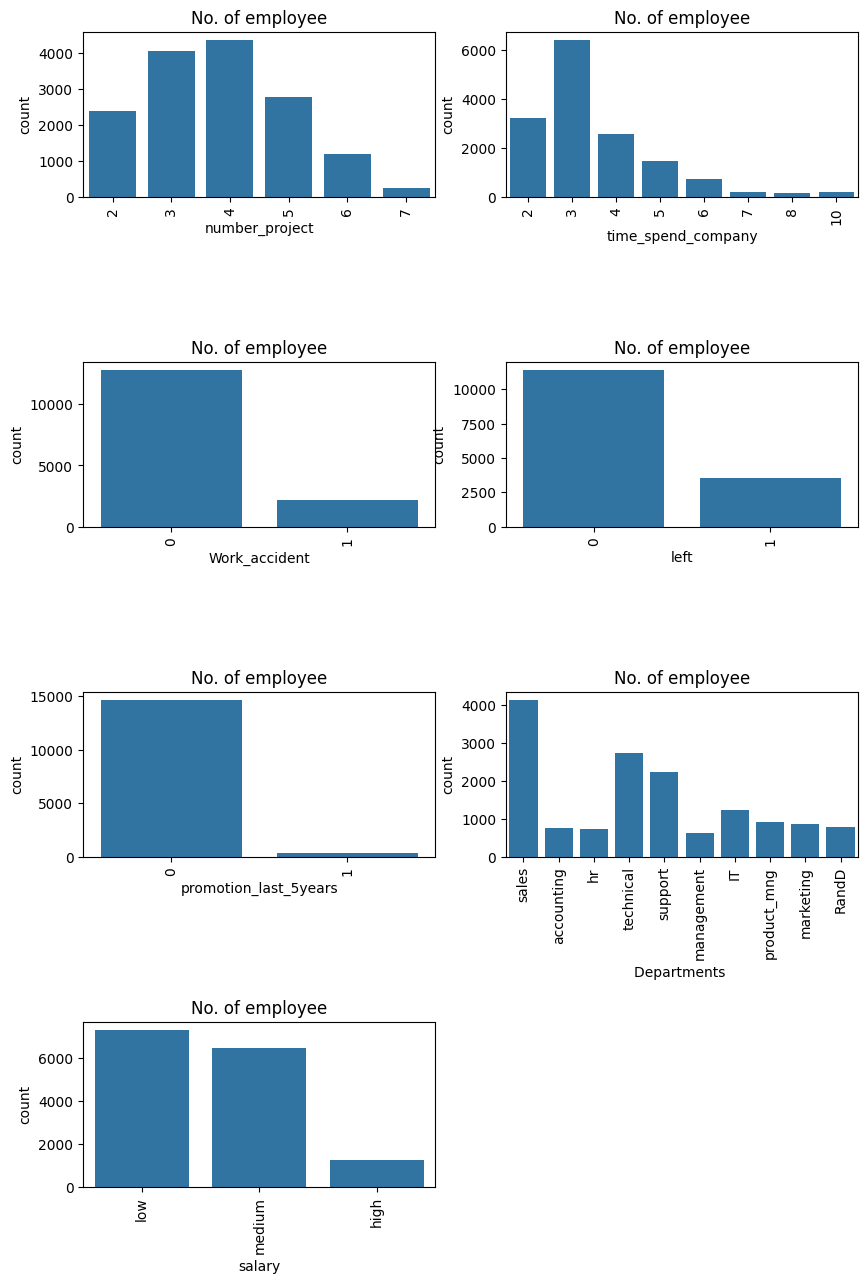

In [12]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Observated the following points in the above visualization:

* Most of the employee is doing the project from 3-5.
* There is a huge drop between 3 years and 4 years experienced employee.
* The no of employee left is 23 % of the total employment.
* A decidedly less number of employee get the promotion in the last 5 year.
* The sales department is having maximum no.of employee followed by technical and support
* Most of the employees are getting salary either medium or low.

<ipython-input-13-437158b7c19b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


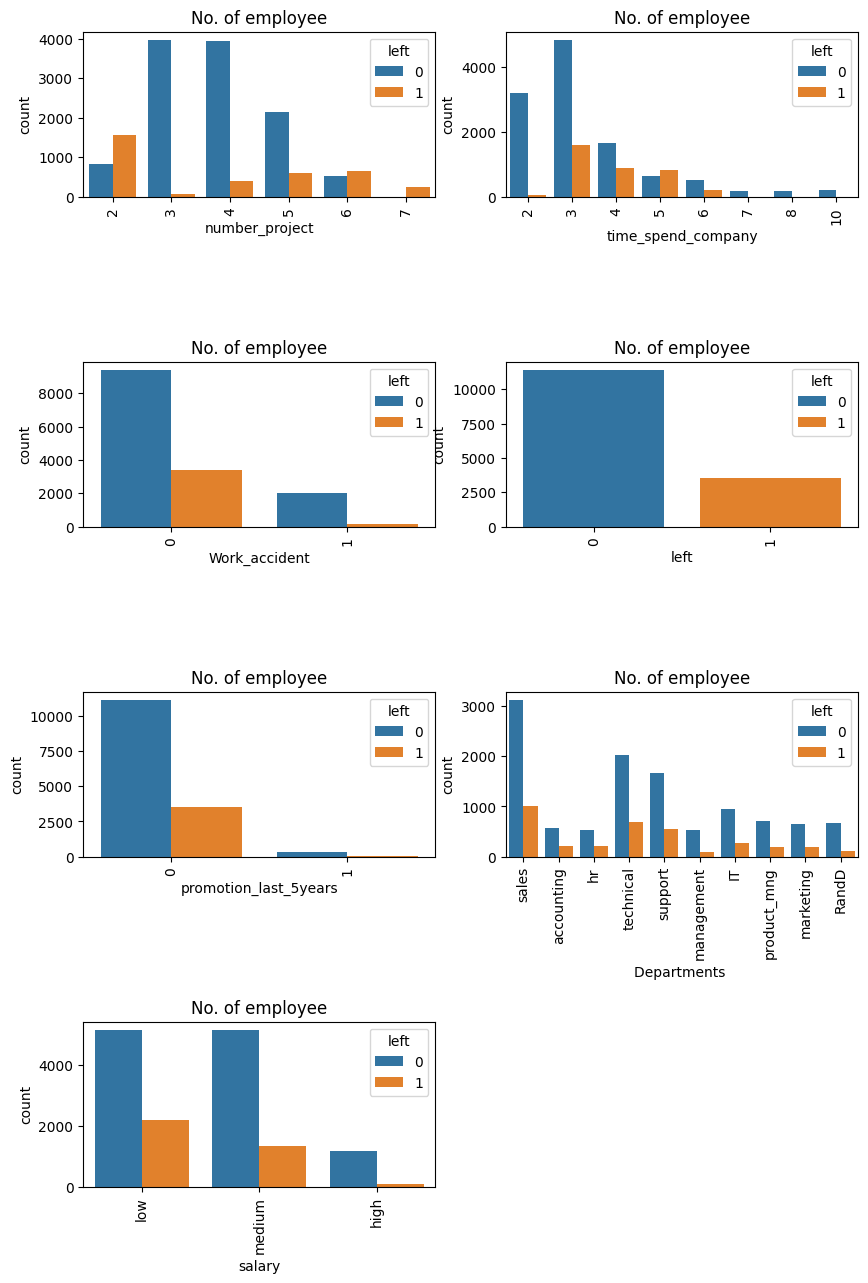

In [13]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Observed the following points in the above visualization:

* Those employees who have the number of projects more than 5 were left the company.
* The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

# v. Data Analysis and Visualization Summary:

Following features are most influencing a person to leave the company:

* Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
* Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
* Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
* Salary: Most of the employees that quit among the mid or low salary groups.

# 4. Cluster Analysis:

Let's find out the groups of employees who left. The most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [14]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


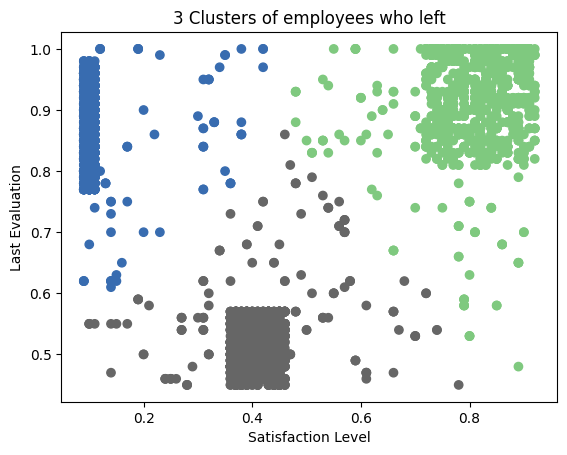

In [15]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

* High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

# 5. Building a Prediction Model using Gradient Boosting Tree.

# i. Pre-Processing Data

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.

This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder

In [16]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

Here, you imported preprocessing module and created Label Encoder object. Using this LabelEncoder object you fit and transform "salary" and "Departments " column into numeric column.

# ii. Split Train and Test Set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [17]:
#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

# iii. Model Building

Let's build employee an churn prediction model.

Here, you are going to predict churn using Gradient Boosting Classifier.

First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function.

Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [19]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

# 6. Evaluating Model Performance

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


Well, got a classification rate of 97%, considered as good accuracy.

* Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% of the time.

* Recall: If there is an employee who left present in the test set and your Gradient Boosting model can identify it 92% of the time.

In [21]:
def check_attendance(employee_id):
  """
  Checks the attendance of an employee based on their employee ID.

  Args:
    employee_id: The employee ID to check.

  Returns:
    True if the employee is present, False otherwise.
  """

  # Replace this with your actual attendance data source.
  attendance_data = {
    "12345": True,
    "54321": False,
  }

  if employee_id in attendance_data:
    return attendance_data[employee_id]
  else:
    raise ValueError("Invalid employee ID.")

# Example usage
employee_id = "12345"
if check_attendance(employee_id):
  print("Employee is present.")
else:
  print("Employee is absent.")

Employee is present.
